#Лабраторная работа №1. Создание "истории о данных".


## Загрузка необходимых библиотек.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

##Описание набора данных. Загрузка данных.

Набор данных __[Airline Passenger Satisfaction](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction?select=test.csv)__ содержит опрос пассажиров об их  удовлетворенности услугами авиакомпании. Содержание набора данных:

- **Gender:** пол пассажира [Female, Male] (женщина, мужчина)
- **Customer Type:** тип пассажира [Loyal/disloyal customer] (лояльный/нелояльный пассажир)
- **Age:** возраст пассажира
- **Type of Travel:** цель полета [Personal/Business Travel] (личная/рабочая поездка)
- **Class:** класс поездки в самолете [Business, Eco, Eco Plus] (бизнесс/эконом/эконом+ класс)
- **Flight distance:** расстояние полета 
- **Inflight wifi service:** уровень удовлетворенности услугой Wi-Fi в полете (0-  неприменимо;1-5)
- **Departure/Arrival time convenient:** уровень удовлетворенности удобным временем отправления/прибытия
- **Ease of Online booking:** уровень удовлетворенности онлайн-бронированием
- **Gate location:** уровень удовлетворенности расположением ворот
- **Food and drink:** уровень удовлетворенности едой и напитками
- **Online boarding:** уровень удовлетворенности онлайн-посадкой
- **Seat comfort:** уровень удовлетворенности комфортом сиденья
- **Inflight entertainment:** Уровень удовлетворенности развлечениями во время полета
- **On-board service:** уровень удовлетворенности обслуживанием на борту
- **Leg room service:** уровень удовлетворенности обслуживанием в номерах для ног
- **Baggage handling:** уровень удовлетворенности обработкой багажа
- **Check-in service:** уровень удовлетворенности обслуживанием при регистрации
- **Inflight service:** уровень удовлетворенности обслуживанием в полете
- **Cleanliness:** уровень удовлетворенности чистотой
- **Departure Delay in Minutes:** задержка отправления в минутах
- **Arrival Delay in Minutes:** задержка прибытия в минутах
- **Satisfaction:** уровень удовлетворенности авиакомпании [Satisfaction, neutral or dissatisfaction] (удовлетворен, нейтрально или неудовлетворен)


###Загрузка набора данных

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/train.csv', sep=",")
# Первые 5 строк датасета
data = data.drop(['id', 'Unnamed: 0'], axis=1)
data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


С помощью представленных данных можно проанализировать качество предоставляемых услуг авиакомпанией. И определить дальнейшую стратегию улучшения качества услуг авиакомпании, которая позволит привлечь большее количество пассажиров и тем самым увеличить прибыль.

## 1.   Определение пассажиров по каждому классу относительно общего количества оценок.

([<matplotlib.patches.Wedge at 0x7f931de5acd0>,
 [Text(0.07600296413668083, 1.0973711994773867, 'Eco Plus'),
  Text(-0.32058604128300144, -1.052247399680557, 'Business'),
  Text(1.0718831583365211, -0.24711635897796147, 'Eco')],
 [Text(0.04145616225637136, 0.5985661088058473, '47.8%'),
  Text(-0.17486511342709168, -0.5739531270984856, '45.0%'),
  Text(0.5846635409108296, -0.13479074126070623, '7.2%')])

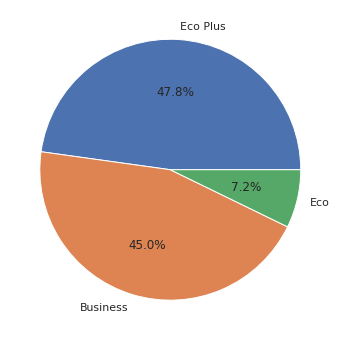

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(data['Class'].value_counts(),labels=data['Class'].unique(), autopct='%1.1f%%')

Большее количество пассажиров преобрели билеты класса "Эконом Плюс" - 47,8%, примерно такое же количество преобрели билеты класса "Бизнесс", а билеты класса "Эконом" преобрели всего 7,2% пассажиров.

##2. Визуализация разпределения оценок по различным характеристикам

Определим количество оценок по каждому параметру.

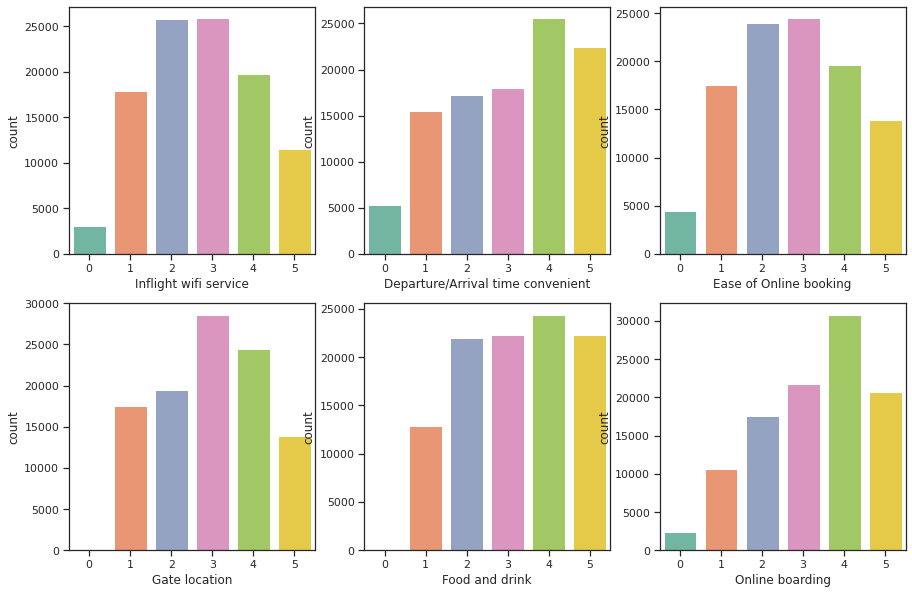

In [ ]:
fig, axes = plt.subplots(2, 3, figsize = (15, 10))
sns.countplot(x = 'Inflight wifi service',  data = data, palette="Set2", ax = axes[0, 0]);
sns.countplot(x = 'Departure/Arrival time convenient',  data = data, palette="Set2",  ax = axes[0, 1]);
sns.countplot(x = 'Ease of Online booking',  data = data, palette="Set2", ax = axes[0, 2]);
sns.countplot(x = 'Gate location',  data = data, palette="Set2", ax = axes[1, 0]);
sns.countplot(x = 'Food and drink',  data = data, palette="Set2", ax = axes[1, 1]);
sns.countplot(x = 'Online boarding',  data = data, palette="Set2", ax = axes[1, 2]);

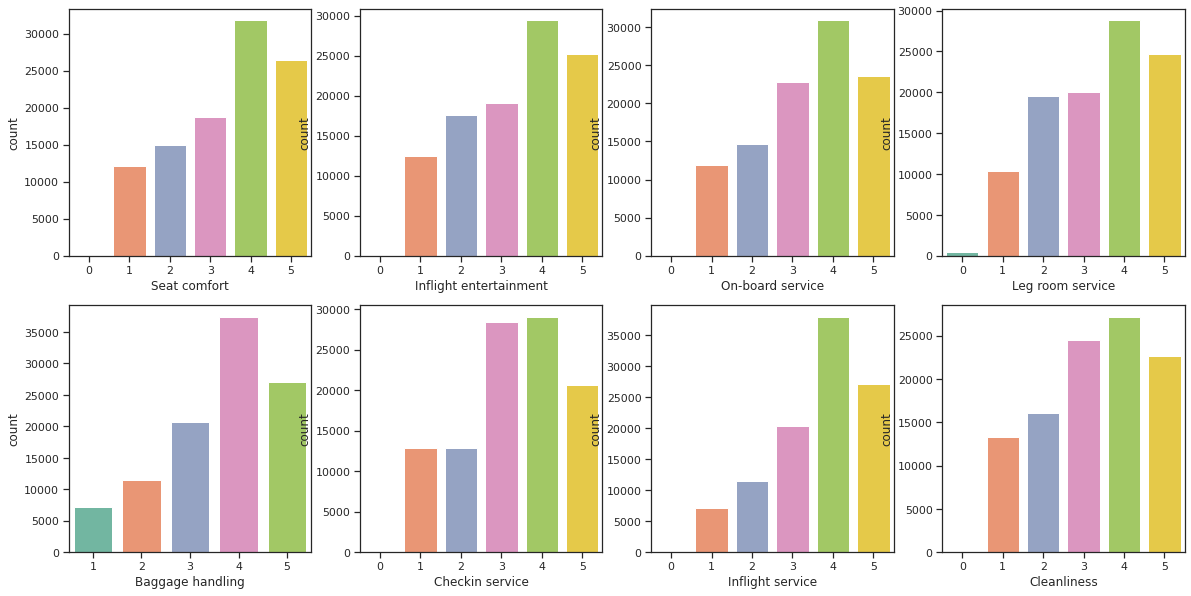

In [ ]:
fig, axes = plt.subplots(2, 4, figsize = (20, 10))
sns.countplot(x = 'Seat comfort',  data = data, palette="Set2", ax = axes[0, 0]);
sns.countplot(x = 'Inflight entertainment',  data = data, palette="Set2", ax = axes[0, 1]);
sns.countplot(x = 'On-board service',  data = data, palette="Set2", ax = axes[0, 2]);
sns.countplot(x = 'Leg room service',  data = data, palette="Set2", ax = axes[0, 3]);
sns.countplot(x = 'Baggage handling',  data = data, palette="Set2", ax = axes[1, 0]);
sns.countplot(x = 'Checkin service',  data = data, palette="Set2", ax = axes[1, 1]);
sns.countplot(x = 'Inflight service',  data = data, palette="Set2", ax = axes[1, 2]);
sns.countplot(x = 'Cleanliness',  data = data, palette="Set2", ax = axes[1, 3]);

Данные графики показывают общее количество всех оценок по каждому параметру. Чтобы определить приоритет услуг, качество которых необходимо улучшить, построим графики с группировкой оценок по Классам. Так как вероятно улучшения необходимы только в некоторых из них.

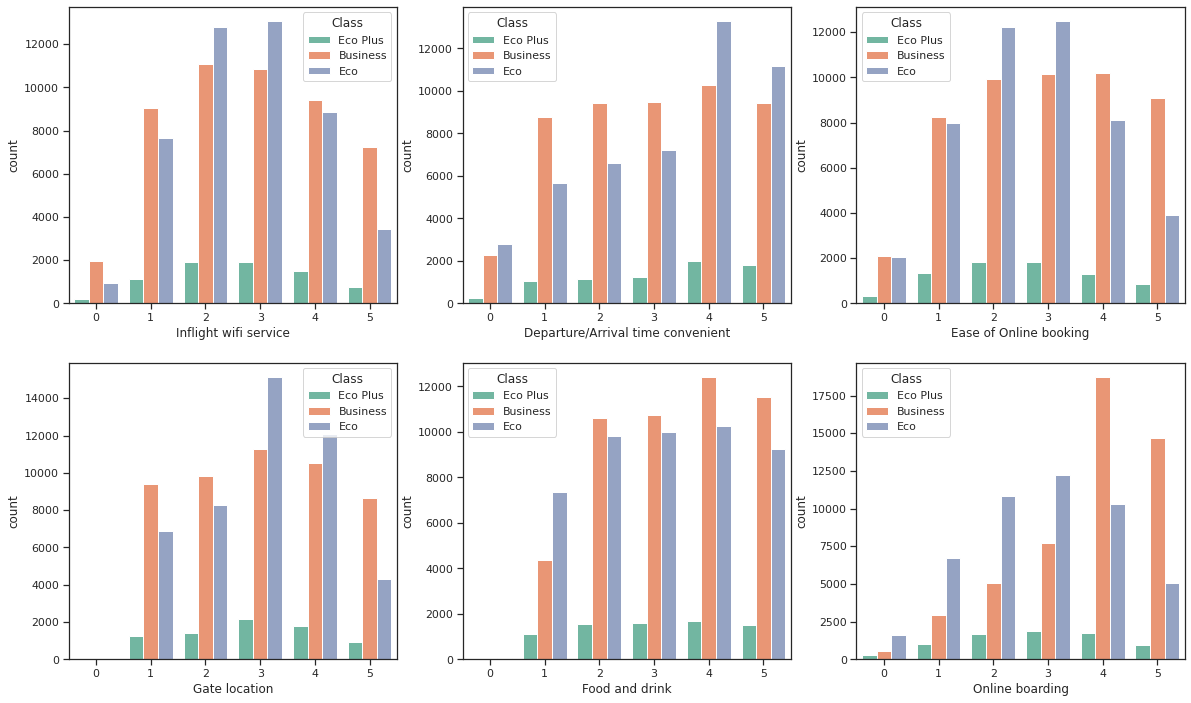

In [ ]:
fig, axes = plt.subplots(2, 3, figsize = (20, 12))
sns.countplot(x = 'Inflight wifi service', hue="Class", data = data, palette="Set2", ax = axes[0, 0]);
sns.countplot(x = 'Departure/Arrival time convenient', hue="Class", data = data, palette= "Set2", ax = axes[0, 1]);
sns.countplot(x = 'Ease of Online booking', hue="Class", data = data, palette= "Set2", ax = axes[0, 2]);
sns.countplot(x = 'Gate location', hue="Class", data = data, palette= "Set2", ax = axes[1, 0]);
sns.countplot(x = 'Food and drink', hue="Class", data = data, palette= "Set2", ax = axes[1, 1]);
sns.countplot(x = 'Online boarding', hue="Class", data = data, palette= "Set2", ax = axes[1, 2]);



Услиги "Wi-Fi в поелете" и "легкость онлайн бронирования" имеют большее количество оценок 2 и 3 во всех классах.  

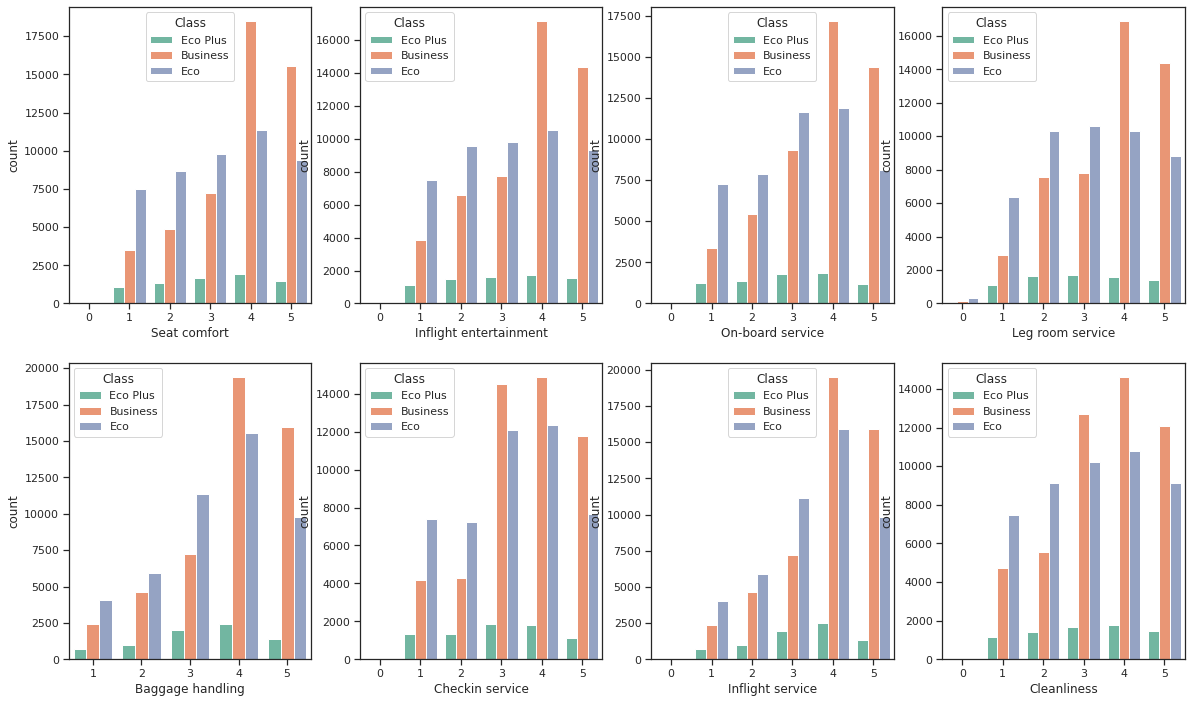

In [ ]:
fig, axes = plt.subplots(2, 4, figsize = (20, 12))
sns.countplot(x = 'Seat comfort', hue="Class", data = data, palette= "Set2", ax = axes[0, 0]);
sns.countplot(x = 'Inflight entertainment', hue="Class", data = data, palette= "Set2", ax = axes[0, 1]);
sns.countplot(x = 'On-board service', hue="Class", data = data, palette= "Set2", ax = axes[0, 2]);
sns.countplot(x = 'Leg room service', hue="Class", data = data, palette= "Set2", ax = axes[0, 3]);
sns.countplot(x = 'Baggage handling', hue="Class", data = data, palette= "Set2", ax = axes[1, 0]);
sns.countplot(x = 'Checkin service', hue="Class", data = data, palette= "Set2", ax = axes[1, 1]);
sns.countplot(x = 'Inflight service', hue="Class", data = data, palette= "Set2", ax = axes[1, 2]);
sns.countplot(x = 'Cleanliness', hue="Class", data = data, palette= "Set2", ax = axes[1, 3]);

Графики параметров представленные выше показывают, что для бизнес-класса большее количество оценок находится в диапазоне от 3 до 5, что говорит о хорошем качестве услуг. Для класса эконом+ распределение оценок примерно одинаково. 

##3. Визуализация распределения возраста и пола пассажиров относительно удовлетворенности услугами

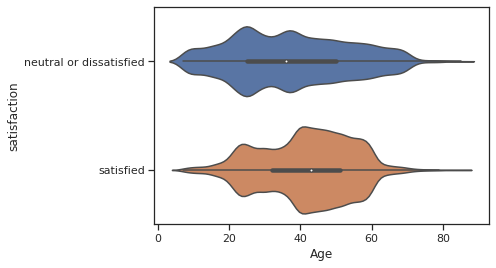

In [ ]:
# Распределение параметра "Возраст" сгруппированного по параметру "Удовлетвореннось".
sns.violinplot(x='Age', y='satisfaction',  data=data)

Из графика выше видно, что большее количество пассажиров, удовлетворенных услугами, находятся в возрасте примерно от 35 до 60 лет. В большинстве случаев неудовлетворены услугами (или нейтральны) пассажиры в возрасте от 15 до 40.


Рассмотрим более подробно соотношение мужчин и женщин довольных или недовольных услугами авиакомпании.

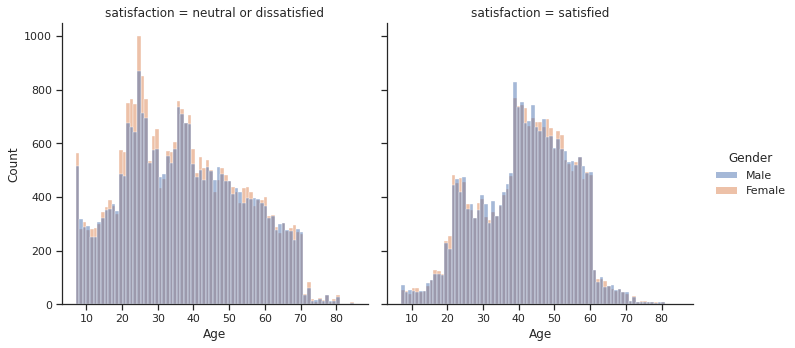

In [ ]:
sns.displot(data, x="Age", hue="Gender", col="satisfaction")

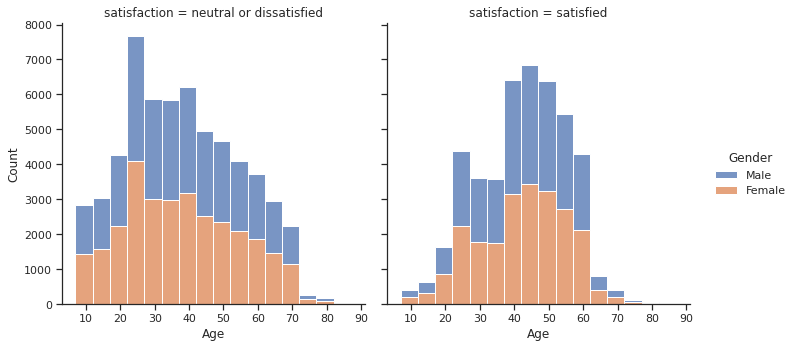

In [ ]:
sns.displot(data, x="Age", hue="Gender",col="satisfaction", multiple="stack", binwidth= 5)

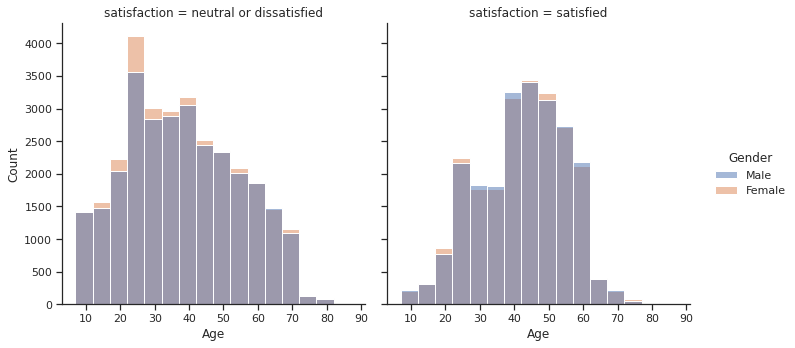

In [ ]:
sns.displot(data, x="Age", hue="Gender", col="satisfaction",  binwidth= 5)

Соотношение мужчин и женщин примерно одинаково, исключением являются недовольные пассажиры в возрасте от 22 до 26. В данном диапазоне женщин немного больше.

##4. Визуализация влияния расстояния полета на итоговую оценку.

Построим график показывающий распределение оценок в зависимости от расстояния полета.

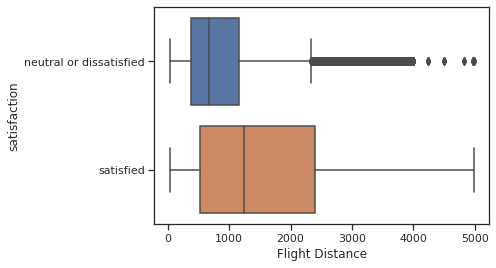

In [ ]:
sns.boxplot(data=data, x="Flight Distance", y="satisfaction")

Большее количество недовольних пассажиров летали на расстояния до 1200. 

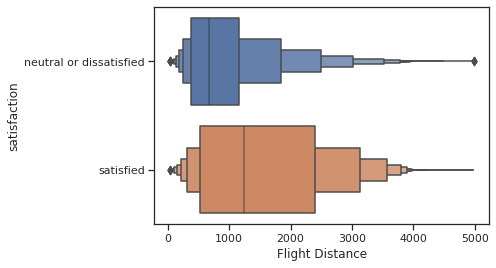

In [ ]:
sns.boxenplot(data=data, x="Flight Distance", y="satisfaction")

Добавим группировку данных по классу билетов.

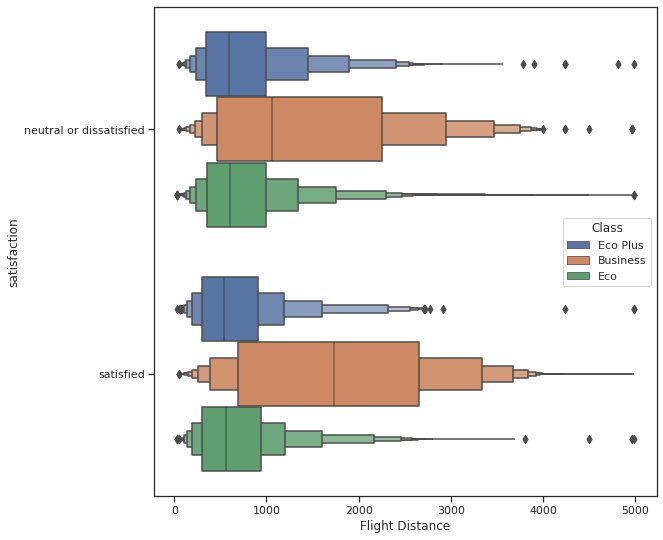

In [ ]:
plt.figure(figsize=(9,9))
sns.boxenplot(data=data, x="Flight Distance", y="satisfaction", hue="Class")

##5. Визуализация корреляции между парамметрами

Построим корреляционную матрицу, чтобы определить какие параметры сильно влияют на удовлетворенность пасажиров услугами компании.

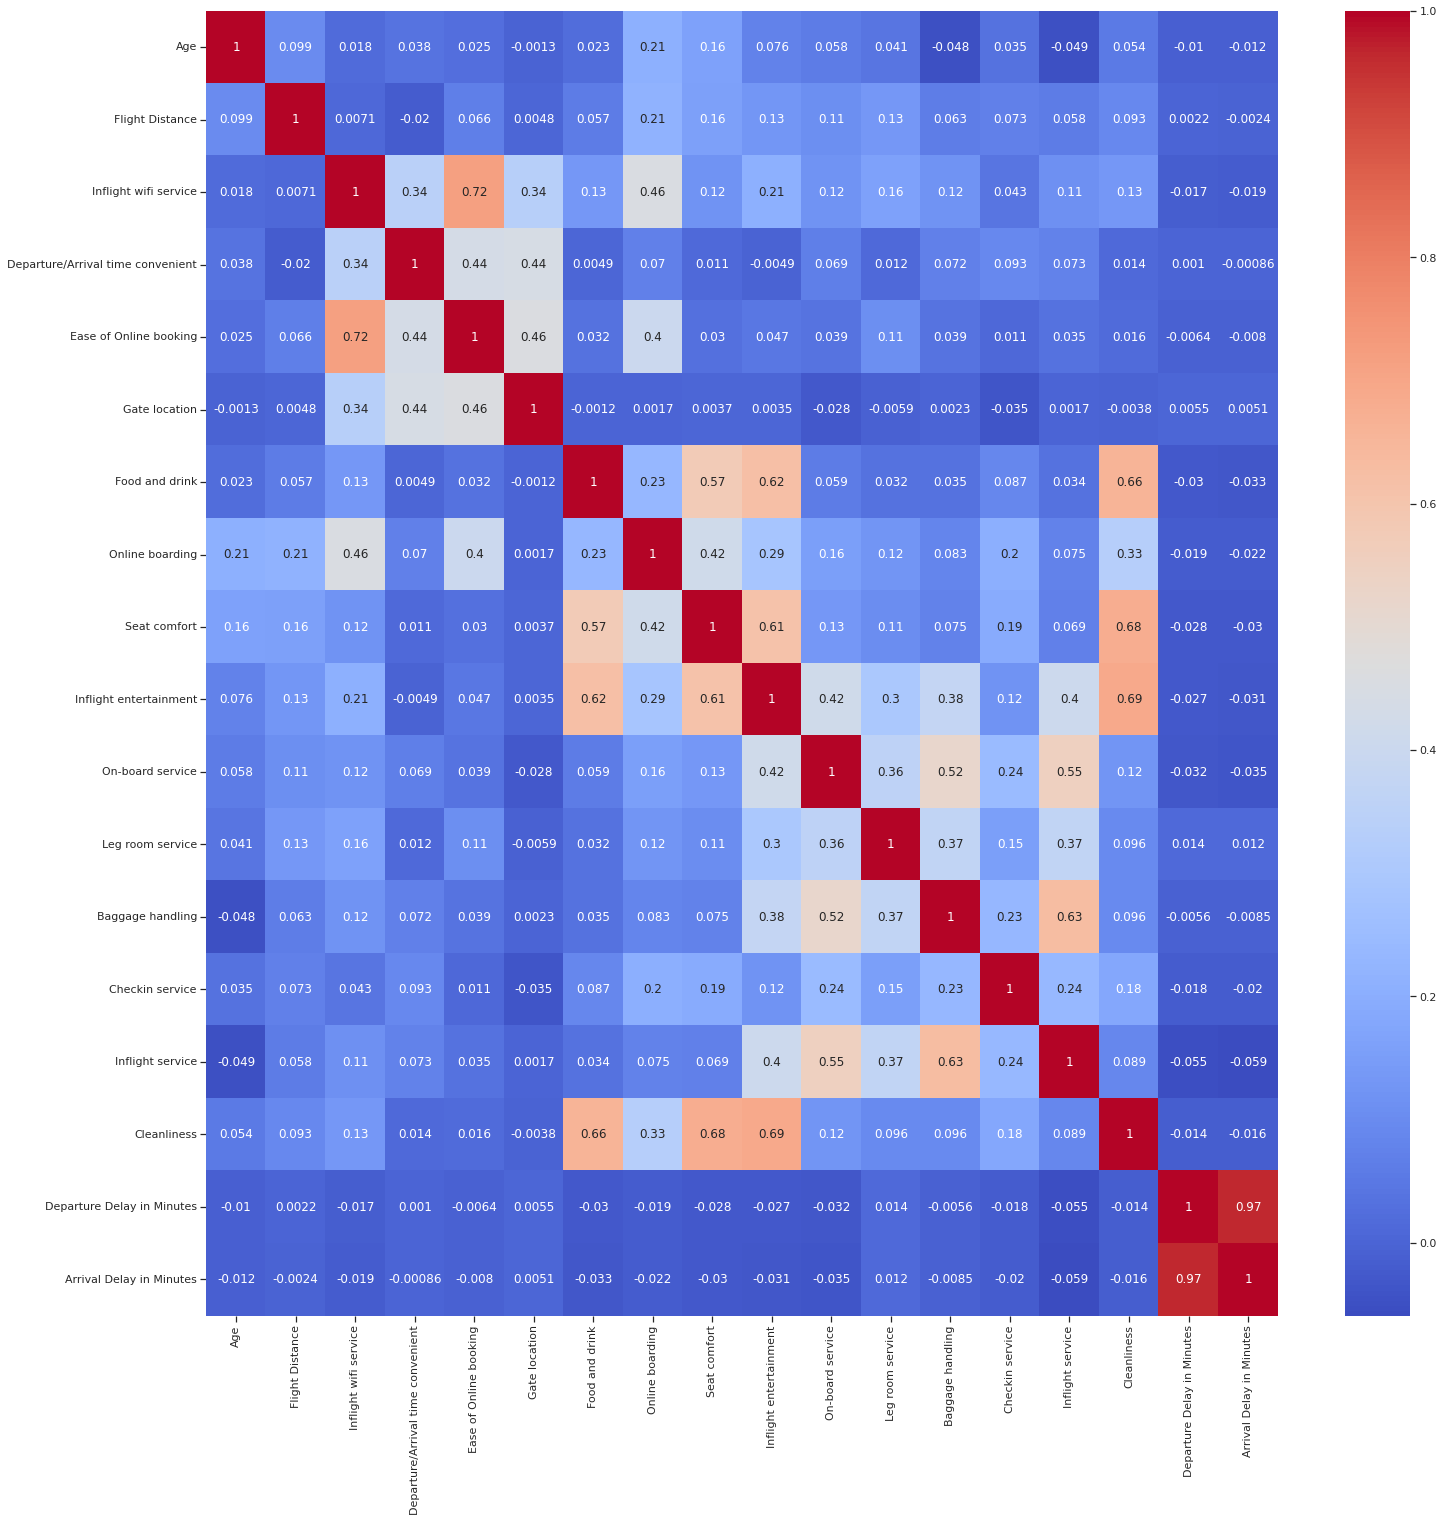

In [ ]:
plt.figure(figsize=(24,24))
sns.heatmap(data.corr(), annot=True, cmap = 'coolwarm',)

Так как "Удовлетворенность" является категориальным признаком, она не отображается в корреляционной матрице. Следовательно необходимо преобразовать данные в числовые.

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data_le = le.fit_transform(data['satisfaction'])
data['satisfaction'] = data_le

#data_le = le.fit_transform(data['Class'])
#data['Class'] = data_le

#data_le = le.fit_transform(data['Gender'])
#data['Gender'] = data_le

#data_le = le.fit_transform(data['Type of Travel'])
#data['Type of Travel'] = data_le

#data_le = le.fit_transform(data['Customer Type'])
#data['Customer Type'] = data_le

data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


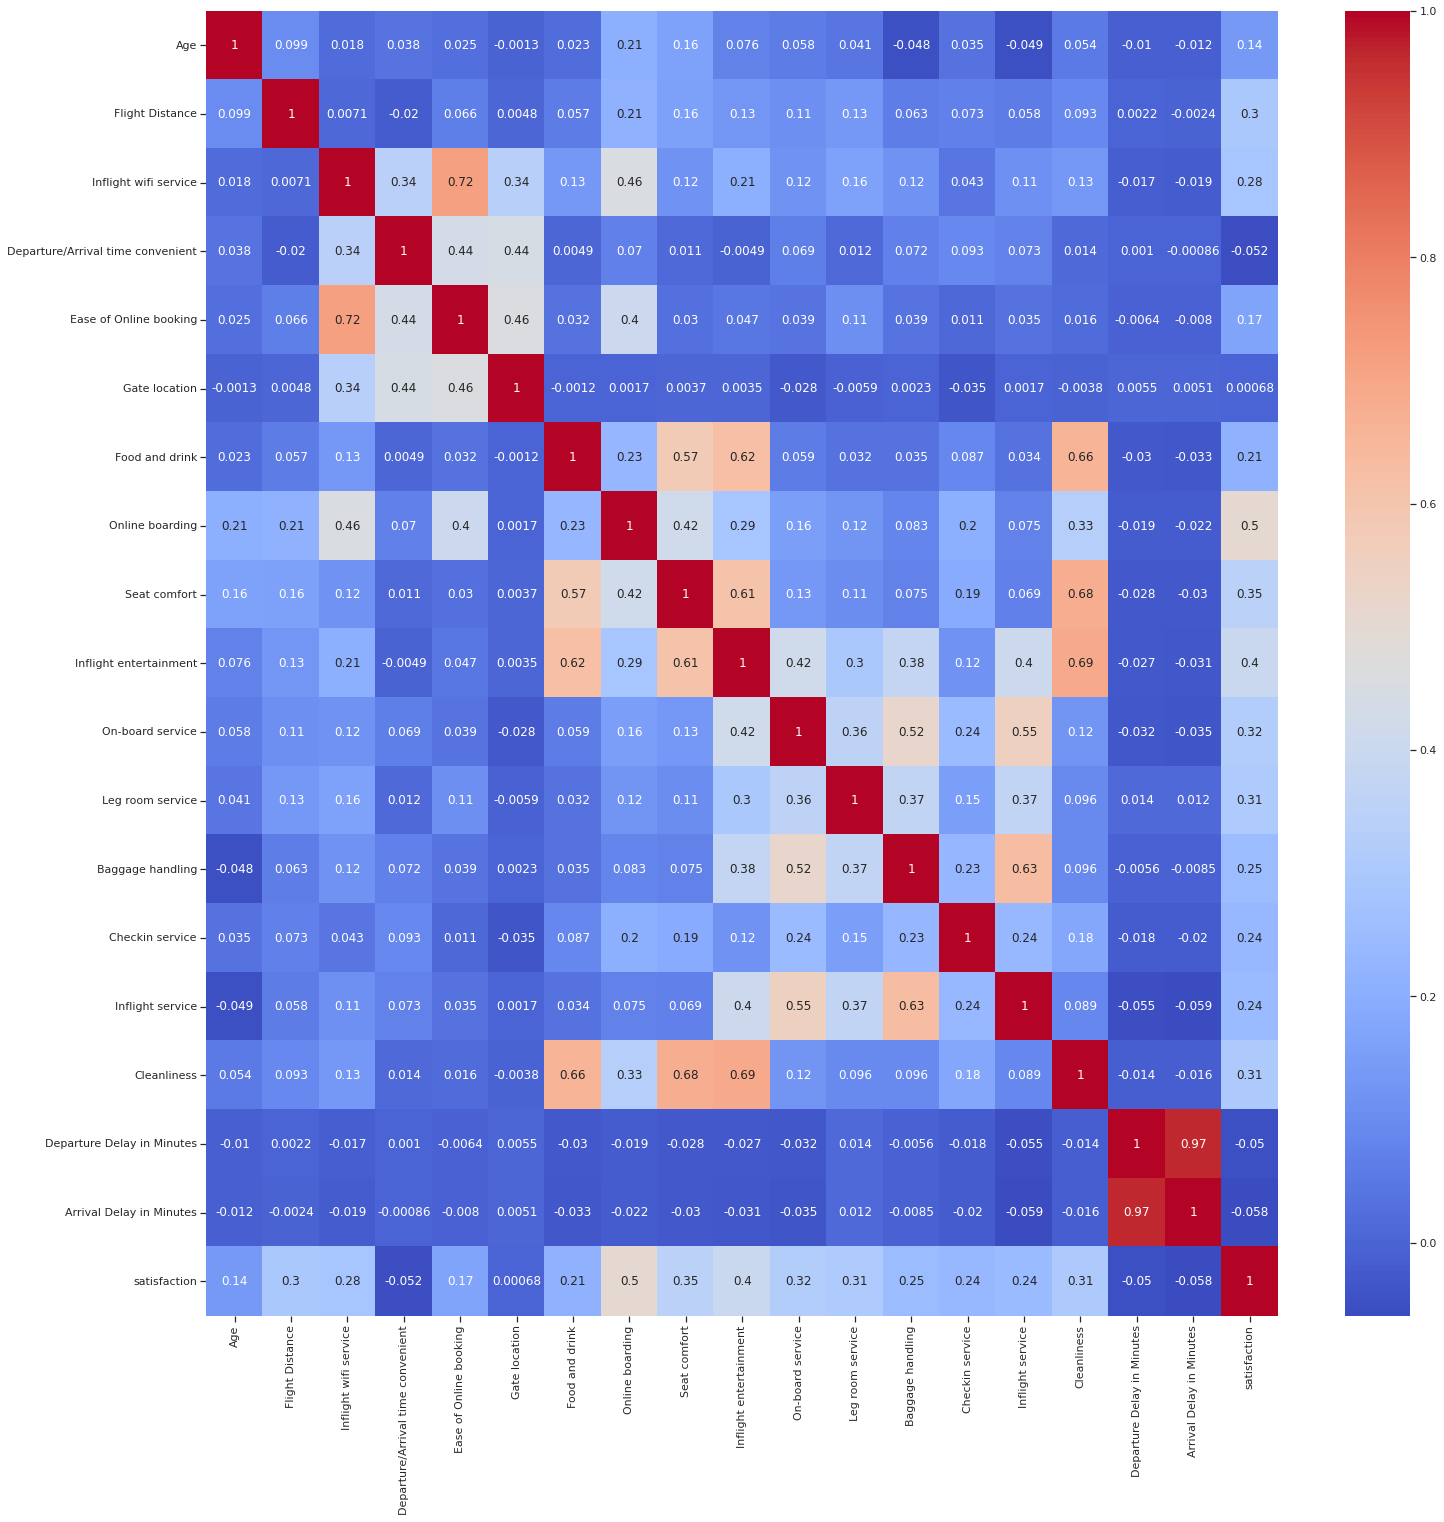

In [ ]:
plt.figure(figsize=(24,24))
sns.heatmap(data.corr(), annot=True, cmap = 'coolwarm',)

Из данной матрицы видно, что наибольшее влияние по сравнению с другими параметрами имеют: Онлайн-посадка, Развлечения в полете и Комфорт сидений.

##Вывод

На основе проведенных исследований набора данных с оценками пасажиров можно сделать следующие выводы:

*   45% пассажиров от общего колличества оценивших качество услуг авиакомпании преобретали билеты "Бизнес-класса", 47,8% - "Эконом+" и 7,2% - "Эконом".
*   Большинство низких оценок пасажиры поставили следующим параметрам " удобство онлайн бронирования" и "wi-fi в полете"
*   Большее количество пасажиров, удовлетворенных услугами, находятся в возрасте примерно от 35 до 60 лет. В большинстве случаев неудовлетворены услугами (или нейтральны) пасажиры в возрасте от 15 до 40.
*   Соотношение мужчин и женщин (довольных и недовольных) примерно одинаково, исключением являются недовольные пассажиры в возрасте от 22 до 26. В данном диапазоне женщин немного больше.
*   Большее количество недовольних пассажиров летали на расстояния до 2000.
*   На данном этапе визуализации и обработки данных наибольшее влияние на итоговую оценку полета влияют "Онлайн-посадка", "Развлечения в полете" и "Комфорт сидений".

Чтобы улучшить качество предоставляемых услуг авиакомпанией, необходимо более подробно изучить оценки пассажиров в возрасте от 15 до 40 и оценки пассажиров, летающих на небольшие расстояния (до 2000). 

Также,стоит обратить внимание на следующие параметры: "Онлайн-посадка", "Развлечения в полете" и "Комфорт сидений" - так как они влияют на итоговую удовлетворенность пасажиров. Следует сделать более удобным онлайн-бронирование билетов и улучшить качество wi-fi в полете, так как именно эти параметры имеют много низких оценок.

Также необходима дальнейшая обработка набора данных, для более точного анализа влияния параметров на итоговую оценку.





